# Tugas Pendahuluan Modul 6 PBF

### Nama : Rafi Fadhlillah
### NIM : 121450143
### Kelas : RC

### 1. Jelaskan konsep dasar higher order function dan peran higher order function dalam paradigma fungsi!

Jawaban : Higher-order functions adalah fungsi yang dapat mengambil satu atau lebih fungsi sebagai argumen dan/atau mengembalikan sebuah fungsi sebagai hasilnya. Higher-order functions memungkinkan kita untuk membuat abstraksi yang lebih tinggi daripada fungsi-fungsi sederhana. Kita dapat menggunakan higher-order functions untuk membuat fungsi yang lebih kompleks dan reusable. Selain itu, higher-order functions juga memungkinkan untuk melakukan komposisi fungsi, yaitu menggabungkan dua atau lebih fungsi menjadi sebuah fungsi baru. Hal ini sangat berguna dalam membangun fungsi yang kompleks dan modular, yang dapat digunakan kembali dan mudah dipelihara.

Peran higher-order functions dalam paradigma fungsi adalah memberikan fleksibilitas dan kemampuan untuk membangun fungsi yang lebih kompleks dan reusable. Higher-order functions memungkinkan kita untuk memanipulasi fungsi seperti halnya tipe data lainnya, dan membuka kemungkinan untuk membuat kode yang lebih pendek, efisien, dan mudah dibaca.

### 2. Apabila kita memiliki data yang berdistribusi normal, salah satu cara untuk kita dapat mengidentifikasi outlier adalah menggunakan z-score.

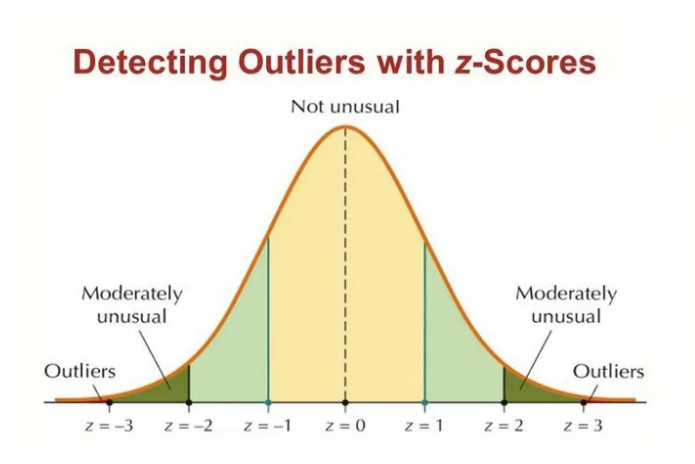

#### 1. Cari dataset yang berdistribusi normal di website (atau bisa generate dengan excel) lalu deteksi outlier (modifikasi data tersebut agar memiliki outlier) menggunakan rumus modified z-score

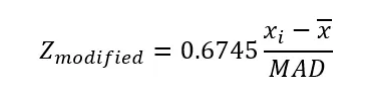

In [1]:
import numpy as np

np.random.seed(123)
data = np.random.normal(loc=0, scale=1, size=50) #generate dataset
data[5] = 5.0 #modifikasi data agar memiliki outliers

print("Data:", data)

Data: [-1.08563060e+00  9.97345447e-01  2.82978498e-01 -1.50629471e+00
 -5.78600252e-01  5.00000000e+00 -2.42667924e+00 -4.28912629e-01
  1.26593626e+00 -8.66740402e-01 -6.78886152e-01 -9.47089689e-02
  1.49138963e+00 -6.38901997e-01 -4.43981960e-01 -4.34351276e-01
  2.20593008e+00  2.18678609e+00  1.00405390e+00  3.86186399e-01
  7.37368576e-01  1.49073203e+00 -9.35833868e-01  1.17582904e+00
 -1.25388067e+00 -6.37751502e-01  9.07105196e-01 -1.42868070e+00
 -1.40068720e-01 -8.61754896e-01 -2.55619371e-01 -2.79858911e+00
 -1.77153310e+00 -6.99877235e-01  9.27462432e-01 -1.73635683e-01
  2.84591590e-03  6.88222711e-01 -8.79536343e-01  2.83627324e-01
 -8.05366518e-01 -1.72766949e+00 -3.90899794e-01  5.73805862e-01
  3.38589051e-01 -1.18304945e-02  2.39236527e+00  4.12912160e-01
  9.78736006e-01  2.23814334e+00]


In [2]:
def calculate_modified_z_score(data):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    xbar = np.mean(data)
    z_modified_scores = 0.6745 * (data - xbar) / mad
    return z_modified_scores

z_modified_scores = calculate_modified_z_score(data)
threshold = 3.5
outliers = np.where(np.abs(z_modified_scores) > threshold)
print("Outliers:", outliers)
print("-------------------------------------------")
print("z_modified_scores : ", z_modified_scores)

Outliers: (array([5], dtype=int64),)
-------------------------------------------
z_modified_scores :  [-1.00319185  0.78913376  0.17444682 -1.36515811 -0.56691056  4.23327332
 -2.15711573 -0.43810977  1.02024644 -0.81484474 -0.65320295 -0.1505396
  1.21424092 -0.61879803 -0.45107638 -0.44278953  1.82907715  1.81260444
  0.79490614  0.26325349  0.56543306  1.21367508 -0.87429717  0.94271244
 -1.14796495 -0.61780807  0.71148528 -1.29837406 -0.18957002 -0.81055489
 -0.28899718 -2.47713072 -1.59338616 -0.67126502  0.72900195 -0.21845318
 -0.06659714  0.52314482 -0.82585518  0.17500511 -0.76203473 -1.55564311
 -0.4054011   0.42469325  0.22229769 -0.07922566  1.98949789  0.28625004
  0.77312101  1.85679549]


#### 2. Buat program dengan memanfaatkan fungsi di atas menggunakan konsep lambda function dan HOF (berikan komentar untuk bagian pengaplikasian HOF)


In [3]:
import numpy as np

# definisi fungsi dengan lambda function
calculate_modified_z_score = lambda data: 0.6745 * (data - np.mean(data)) / np.median(np.abs(data - np.median(data)))

# definisi fungsi dengan lambda function dan HOF
detect_outliers = lambda data, threshold: np.where(np.abs(calculate_modified_z_score(data)) > threshold)

# deteksi outlier dengan menggunakan fungsi detect_outliers
outliers = detect_outliers(data, threshold)

# menampilkan data dan outlier
print("Data:", data)
print("Outliers:", outliers[0])


Data: [-1.08563060e+00  9.97345447e-01  2.82978498e-01 -1.50629471e+00
 -5.78600252e-01  5.00000000e+00 -2.42667924e+00 -4.28912629e-01
  1.26593626e+00 -8.66740402e-01 -6.78886152e-01 -9.47089689e-02
  1.49138963e+00 -6.38901997e-01 -4.43981960e-01 -4.34351276e-01
  2.20593008e+00  2.18678609e+00  1.00405390e+00  3.86186399e-01
  7.37368576e-01  1.49073203e+00 -9.35833868e-01  1.17582904e+00
 -1.25388067e+00 -6.37751502e-01  9.07105196e-01 -1.42868070e+00
 -1.40068720e-01 -8.61754896e-01 -2.55619371e-01 -2.79858911e+00
 -1.77153310e+00 -6.99877235e-01  9.27462432e-01 -1.73635683e-01
  2.84591590e-03  6.88222711e-01 -8.79536343e-01  2.83627324e-01
 -8.05366518e-01 -1.72766949e+00 -3.90899794e-01  5.73805862e-01
  3.38589051e-01 -1.18304945e-02  2.39236527e+00  4.12912160e-01
  9.78736006e-01  2.23814334e+00]
Outliers: [5]


####  3. Hapus data yang memiliki nilai abs(z-score) di atas

In [4]:
import numpy as np

# hitung z-score untuk setiap data
z_scores = 0.6745 * (data - np.mean(data)) / np.median(np.abs(data - np.median(data)))

# cari index data yang memiliki abs(z-score) di atas 3
outlier_indices = np.where(np.abs(z_scores) > 3)

# hapus data yang memiliki abs(z-score) di atas 3
clean_data = np.delete(data, outlier_indices)

# tampilkan hasil
print("Data asli: ", data)
print("-------------------------------------------")
print("Data bersih: ", clean_data)


Data asli:  [-1.08563060e+00  9.97345447e-01  2.82978498e-01 -1.50629471e+00
 -5.78600252e-01  5.00000000e+00 -2.42667924e+00 -4.28912629e-01
  1.26593626e+00 -8.66740402e-01 -6.78886152e-01 -9.47089689e-02
  1.49138963e+00 -6.38901997e-01 -4.43981960e-01 -4.34351276e-01
  2.20593008e+00  2.18678609e+00  1.00405390e+00  3.86186399e-01
  7.37368576e-01  1.49073203e+00 -9.35833868e-01  1.17582904e+00
 -1.25388067e+00 -6.37751502e-01  9.07105196e-01 -1.42868070e+00
 -1.40068720e-01 -8.61754896e-01 -2.55619371e-01 -2.79858911e+00
 -1.77153310e+00 -6.99877235e-01  9.27462432e-01 -1.73635683e-01
  2.84591590e-03  6.88222711e-01 -8.79536343e-01  2.83627324e-01
 -8.05366518e-01 -1.72766949e+00 -3.90899794e-01  5.73805862e-01
  3.38589051e-01 -1.18304945e-02  2.39236527e+00  4.12912160e-01
  9.78736006e-01  2.23814334e+00]
-------------------------------------------
Data bersih:  [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025 -2.42667924
 -0.42891263  1.26593626 -0.8667404  -0.678